In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
X=data.drop('Exited',axis=1)
y=data["Exited"]

In [5]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
X=pd.concat([X,geography,gender],axis=1)

In [7]:
X=X.drop(['Geography','Gender','Surname'],axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [11]:
classifier = Sequential()

In [12]:
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=13))
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [13]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100


536/536 [==============================] - 5s 3ms/step - loss: 0.6865 - accuracy: 0.5951 - val_loss: 0.5728 - val_accuracy: 0.7425
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5149 - accuracy: 0.7837 - val_loss: 0.5058 - val_accuracy: 0.7823
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4792 - accuracy: 0.7994 - val_loss: 0.4846 - val_accuracy: 0.7876
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4640 - accuracy: 0.8056 - val_loss: 0.4717 - val_accuracy: 0.7936
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4534 - accuracy: 0.8071 - val_loss: 0.4617 - val_accuracy: 0.7978
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4450 - accuracy: 0.8085 - val_loss: 0.4547 - val_accuracy: 0.7978
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4383 - accuracy: 0.8093 - val_loss: 0.4487 - val_accuracy: 0.79

In [15]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


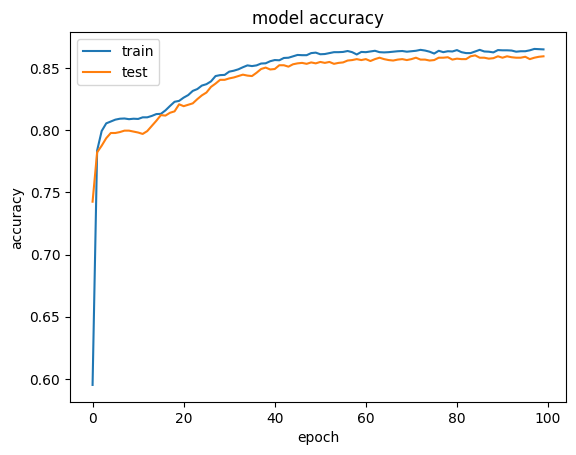

In [16]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [18]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [19]:
score

0.855

In [20]:
classifier.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.8550


[0.33690106868743896, 0.8550000190734863]